In [ ]:
pip install citipy

In [1]:
#Import the dependent libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
import time
# Import the requests library.
import requests
from citipy import citipy
# Import the API key.
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
#for coordinate in coordinates:
#    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [11]:
#Starting URL for weather Map API calls
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
# Create an endpoint URL for a city.
# city_url = url + "&q=" + "Boston"
# print(city_url)

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [ ]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

#    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(30)

#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    print(city_url)
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=kodiak
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 1 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=castro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=saint+george
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=talcahuano
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | talcahuano
http://api.openweathermap.or

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=ushuaia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=tuktoyaktuk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=cidreira
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=qaanaaq
-------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=nowy+dwor+mazowiecki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | nowy dwor mazowiecki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=faanui
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=bubaque
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 2 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=nexo
--------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 3 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=jalu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 3 | jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=coihaique
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 3 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=iqaluit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 3 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=yellowknife
-----------------------------
Data Re

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 3 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=bailieborough
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 3 | bailieborough
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=charagua
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 3 | charagua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=san+francisco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 3 | san francisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=ribeira+grande
-----

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 4 | aleksandrov gay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=puerto+del+rosario
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 4 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=lata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 4 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=ilulissat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 4 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=norsup
---------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 5 | oparino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=jaciara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 5 | jaciara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=cururupu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 5 | cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=chinhoyi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 5 | chinhoyi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=erenhot
-----------------------------
Data R

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 5 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=chuy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 5 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=chunskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 5 | chunskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=omsukchan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 5 | omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=durango
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 6 | parana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=panzhihua
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 6 | panzhihua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=nador
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 6 | nador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=cimitarra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 6 | cimitarra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=oistins
-----------------------------
Dat

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 7 | hemsedal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=georgetown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 7 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=alyangula
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 7 | alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=slave+lake
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 7 | slave lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=ancud
-------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 7 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=qaqortoq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 7 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=mindelo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 7 | mindelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=shebalino
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 7 | shebalino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=waitati
-----------------------------


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | shahr-e kord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=mitsamiouli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=ler
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | ler
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=victoria
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=mucurapo
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 9 | severnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=daru
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 9 | daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=sarkand
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 9 | sarkand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=kirkuk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 9 | kirkuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=yar-sale
-----------------------------
Data Retrieva

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | manacor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=prokopion
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | prokopion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=comodoro+rivadavia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 9 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=pecos
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 9 | pecos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=khakhea
--------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 10 | kungurtug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=hobyo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 10 | hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=olinda
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 10 | olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=miracema+do+tocantins
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 10 | miracema do tocantins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=esfarayen
------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 11 | warmbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=kyshtovka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 11 | kyshtovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=florencia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 11 | florencia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=llanelli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 11 | llanelli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=tautira
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 11 | amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=saint-joseph
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 11 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=larsnes
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 11 | larsnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=olafsvik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 11 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=lida
------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 12 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=tigre
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 12 | tigre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=roncesvalles
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 12 | roncesvalles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=camalu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 12 | camalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=trairi
--------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 13 | luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=alexandria
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 13 | alexandria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=agadez
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 13 | agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=ketchikan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 13 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b27295e82cd6e3894d7aa2b3f6e32229&q=babanusah
City not found. Skippin

In [ ]:
#datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,24.31,58,40,10.36,US,2022-02-09 02:24:45
1,Castro,-24.7911,-50.0119,61.45,98,31,9.04,BR,2022-02-09 02:24:46
2,Saint George,37.1041,-113.5841,61.39,16,0,20.71,US,2022-02-09 02:22:44
3,Talcahuano,-36.7167,-73.1167,64.08,72,0,17.27,CL,2022-02-09 02:24:46
4,Ozark,37.0209,-93.2060,52.21,71,2,7.07,US,2022-02-09 02:24:46
5,Hithadhoo,-0.6000,73.0833,82.83,68,100,14.09,MV,2022-02-09 02:24:47
6,Mataura,-46.1927,168.8643,64.47,66,100,4.99,NZ,2022-02-09 02:24:47
7,Lagoa,39.0500,-27.9833,59.23,71,98,13.13,PT,2022-02-09 02:24:47
8,Faya,18.3851,42.4509,50.52,81,6,3.56,SA,2022-02-09 02:24:47
9,Leua,48.2156,18.6071,44.92,86,100,10.51,SK,2022-02-09 02:24:48


In [22]:
new_column_order = ["lng", "lat", "city"]
city_data_df = city_data_df[new_column_order]

KeyError: "None of [Index(['lng', 'lat', 'city'], dtype='object')] are in the [columns]"

In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
today = time.strftime("%x")
today

'02/08/22'

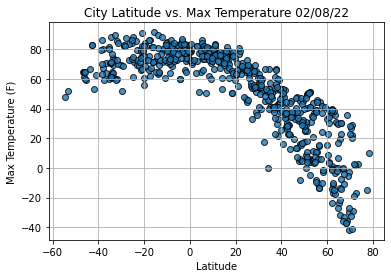

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("images/Fig1.png")

# Show plot.
plt.show()

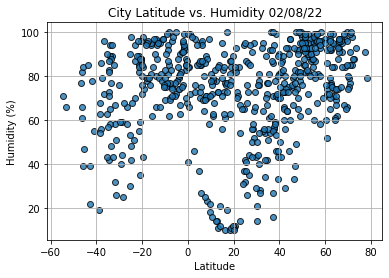

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("images/Fig2.png")
# Show plot.
plt.show()

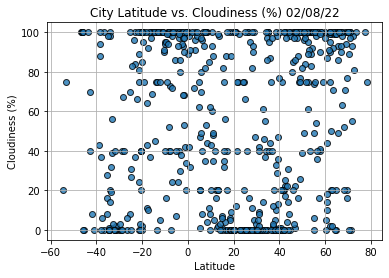

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("images/Fig3.png")
# Show plot.
plt.show()

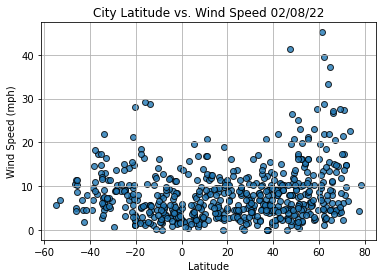

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("images/Fig4.png")
# Show plot.
plt.show()